In [312]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boolart-image-classification/sample_submission.csv
/kaggle/input/boolart-image-classification/train.csv
/kaggle/input/boolart-image-classification/train_image/31973.jpg
/kaggle/input/boolart-image-classification/train_image/19812.jpg
/kaggle/input/boolart-image-classification/train_image/22735.jpg
/kaggle/input/boolart-image-classification/train_image/38246.jpg
/kaggle/input/boolart-image-classification/train_image/52876.jpg
/kaggle/input/boolart-image-classification/train_image/44758.jpg
/kaggle/input/boolart-image-classification/train_image/59454.jpg
/kaggle/input/boolart-image-classification/train_image/44951.jpg
/kaggle/input/boolart-image-classification/train_image/34410.jpg
/kaggle/input/boolart-image-classification/train_image/22706.jpg
/kaggle/input/boolart-image-classification/train_image/59735.jpg
/kaggle/input/boolart-image-classification/train_image/12666.jpg
/kaggle/input/boolart-image-classification/train_image/13288.jpg
/kaggle/input/boolart-image-classific

In [313]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from tqdm import tqdm

In [123]:
images = []
labels = []
for path in tqdm(os.listdir('/kaggle/input/boolart-image-classification/train_image')):
    img_path = os.path.join('/kaggle/input/boolart-image-classification/train_image' , path)
    img = image.load_img(img_path , target_size = (60 , 60))
    img_array = image.img_to_array(img)
    images.append(img_array)
    
    t2 = path
    t2 = t2.split('.')[0]
    labels.append(int(t2))

images = np.array(images)
print(f"Loaded {len(images)} images.")

100%|██████████| 35551/35551 [00:56<00:00, 632.72it/s]


Loaded 35551 images.


In [124]:
print(images.shape)
print(len(labels))

(35551, 60, 60, 3)
35551


In [125]:
labels[0:10]

[31973, 19812, 22735, 38246, 52876, 44758, 59454, 44951, 34410, 22706]

In [131]:
# Save the array to a file
np.save('/kaggle/working/images_data.npy', images)
np.save('/kaggle/working/labels_data.npy',labels)

In [314]:
# Load the previously saved images
train_image = np.load('/kaggle/working/images_data.npy')
train_label = np.load('/kaggle/working/labels_data.npy')

In [315]:
print(len(train_label))
train_image.shape

35551


(35551, 60, 60, 3)

In [137]:
train_label[0:10]

array([31973, 19812, 22735, 38246, 52876, 44758, 59454, 44951, 34410,
       22706])

In [138]:
train_image[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [316]:
train_image = train_image/255.0

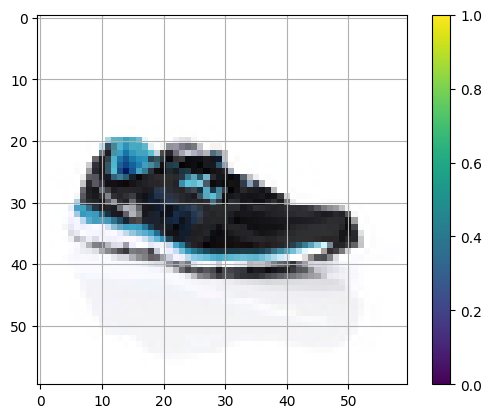

In [317]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [318]:
train_df = pd.read_csv('/kaggle/input/boolart-image-classification/train.csv')
train_df.head()

,id,target
0,15970,0
1,59263,4
2,21379,3
3,1855,0
4,30805,0


In [319]:
train_df = train_df.sort_values(by='id')

In [320]:
train_df.head()

,id,target
10089,1164,0
13069,1165,0
7307,1525,2
26574,1526,2
25908,1528,0


In [321]:
train_label

array([31973, 19812, 22735, ..., 16986, 10035, 11590])

In [322]:
train_label = train_label.ravel()

In [323]:
train_df['new_id'] = train_label

In [324]:
train_df.head()

,id,target,new_id
10089,1164,0,31973
13069,1165,0,19812
7307,1525,2,22735
26574,1526,2,38246
25908,1528,0,52876


In [325]:
train_df['new_target'] = -1

In [326]:
train_df.head()

,id,target,new_id,new_target
10089,1164,0,31973,-1
13069,1165,0,19812,-1
7307,1525,2,22735,-1
26574,1526,2,38246,-1
25908,1528,0,52876,-1


In [327]:
y = []
for i in train_df.new_id:
    y.append(train_df.loc[train_df['id']==i, 'target'].values[0])

In [328]:
train_df['new_target'] = y

In [329]:
train_df.head()

,id,target,new_id,new_target
10089,1164,0,31973,1
13069,1165,0,19812,0
7307,1525,2,22735,1
26574,1526,2,38246,0
25908,1528,0,52876,17


In [330]:
train_label = train_df['new_target'].values

### Finally my data is ready

In [257]:
train_label[0:10]

array([ 1,  0,  1,  0, 17,  1,  0,  8,  0,  1])

In [258]:
train_image[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [259]:
train_label[0:10]

array([ 1,  0,  1,  0, 17,  1,  0,  8,  0,  1])

In [260]:
train_image.shape

(35551, 60, 60, 3)

In [331]:
unique_labels = np.unique(train_label)

In [332]:
len(unique_labels)

44

In [333]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_image, train_label, test_size=0.3, random_state=42)

In [334]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(24885, 60, 60, 3)
(24885,)
(10666, 60, 60, 3)
(10666,)


## Model Building

### CNN MODEL

In [335]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten ,AveragePooling2D

import tensorflow as tf
from tensorflow.keras import layers, models
from keras import backend as K

# Clear the Keras session
K.clear_session()

In [199]:
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(6, kernel_size=(5, 5),  padding='same' , activation='relu',  strides =1 ,  input_shape=(60,60,3)))
    model.add(AveragePooling2D(pool_size=(2, 2) , strides = 2 , padding = 'valid' ))

    # Layer 2: Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5),padding='same' , activation='relu' ,strides =1))
    model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'same' , strides= 2))

    # Flattening the output from the convolutional layers
    model.add(Flatten())

    # Layer 4: Fully Connected Layer
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(84, activation = 'relu'))

    # Layer 5: Output Layer
    model.add(Dense(44, activation='softmax'))
    model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 30, 30, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 15, 15, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │       432,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 44)             │         3,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,896 (1.71 MB)

 Trainable params: 448,896 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

In [200]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(train_images,train_labels , validation_data = (test_images , test_labels) , epochs = 15 ,batch_size=128 ,verbose =1 )

Epoch 1/15


I0000 00:00:1729517784.667770    1865 service.cc:145] XLA service 0x7f19f4047190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729517784.667853    1865 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729517784.667860    1865 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 25/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3393 - loss: 2.9164

I0000 00:00:1729517787.853575    1865 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5708 - loss: 1.7809 - val_accuracy: 0.8011 - val_loss: 0.7570
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8179 - loss: 0.6741 - val_accuracy: 0.8500 - val_loss: 0.5490
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8585 - loss: 0.5063 - val_accuracy: 0.8727 - val_loss: 0.4754
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8717 - loss: 0.4502 - val_accuracy: 0.8756 - val_loss: 0.4476
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8862 - loss: 0.4031 - val_accuracy: 0.8959 - val_loss: 0.3887
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9021 - loss: 0.3384 - val_accuracy: 0.8986 - val_loss: 0.3772
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9128 - loss: 0.3034 - val_accuracy: 0.8971 - val_loss: 0.3759
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9134 - loss: 0.2874 - val_accuracy: 0.9062 - va

In [229]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.947598934173584
val_accuracy 0.9174948334693909
train_loss 0.16446232795715332
val_loss 0.31361159682273865


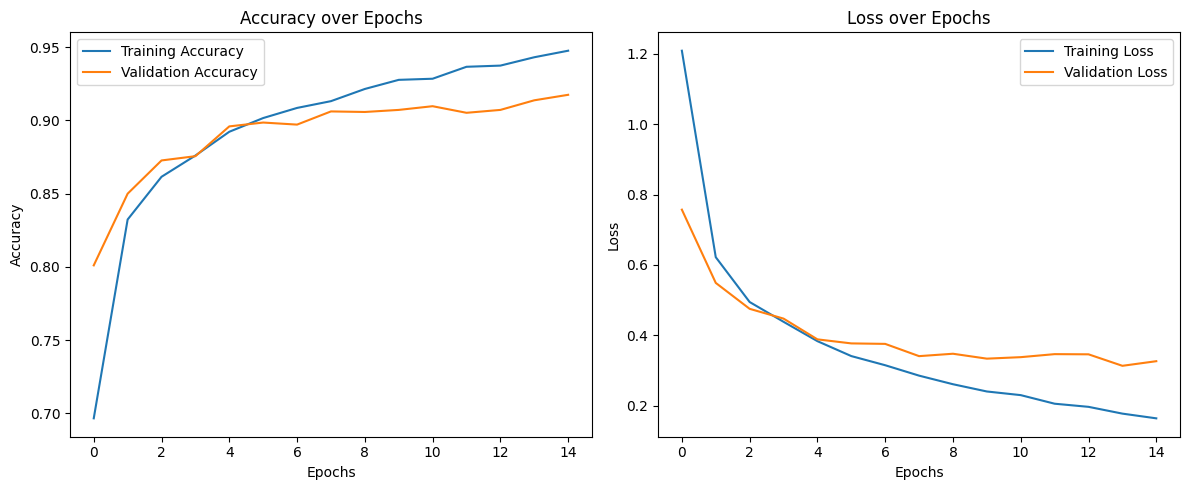

In [202]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [336]:
from tensorflow.keras.applications import ResNet50

In [337]:
# Load the ResNet50 model with pre-trained weights from ImageNet, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Flatten the output from the ResNet model
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(44, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model (assuming train_images and train_labels are prepared)
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=100, batch_size=128, verbose=1)

Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.4178 - loss: 2.4041 - val_accuracy: 0.6615 - val_loss: 1.2481
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6423 - loss: 1.3393 - val_accuracy: 0.7159 - val_loss: 1.0088
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6910 - loss: 1.1331 - val_accuracy: 0.7485 - val_loss: 0.8874
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7250 - loss: 0.9984 - val_accuracy: 0.7727 - val_loss: 0.8068
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7453 - loss: 0.9268 - val_accuracy: 0.7864 - val_loss: 0.7859
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7504 - loss: 0.8962 - val_accuracy: 0.7944 - val_loss: 0.7418
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7686 - loss: 0.8390 - val_accuracy: 0.8096 - val_loss: 0.6825
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7751 - loss: 0.8132 -

In [338]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.8545308709144592
val_accuracy 0.8753984570503235
train_loss 0.5033737421035767
val_loss 0.4601084887981415


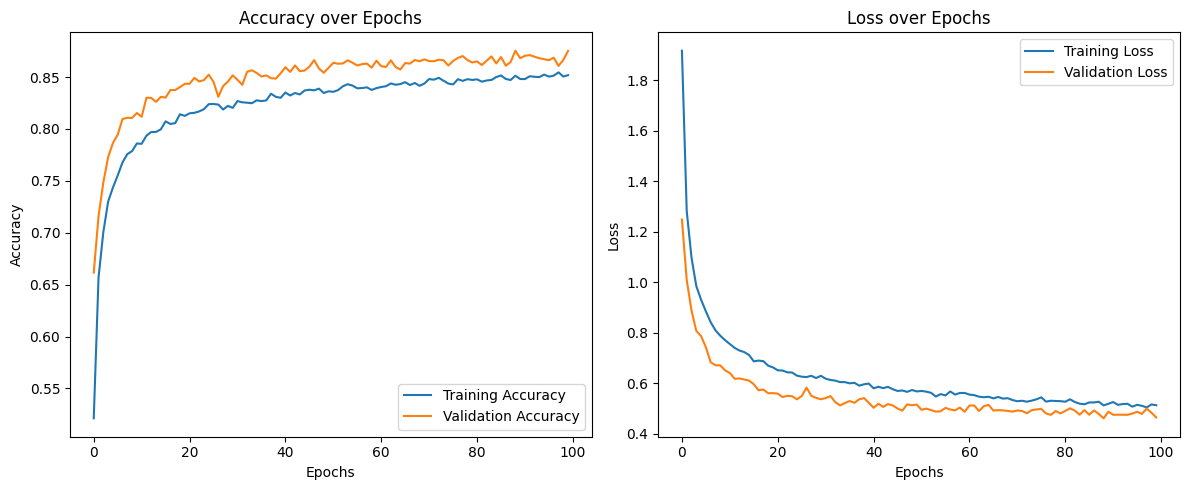

In [339]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [359]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Clear the Keras session
K.clear_session()

In [360]:


def identity_block(x, filters):
    """The identity block."""
    x_shortcut = x
    
    # First convolution layer
    x = Conv2D(filters[0], (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Second convolution layer
    x = Conv2D(filters[1], (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Third convolution layer
    x = Conv2D(filters[2], (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Add shortcut
    x = Add()([x, x_shortcut])
    x = ReLU()(x)
    
    return x

def convolutional_block(x, filters, stride=2):
    """The convolutional block with a shortcut."""
    x_shortcut = x
    
    # First convolution layer
    x = Conv2D(filters[0], (1, 1), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Second convolution layer
    x = Conv2D(filters[1], (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Third convolution layer
    x = Conv2D(filters[2], (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut path
    x_shortcut = Conv2D(filters[2], (1, 1), strides=stride, padding='same')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)
    
    # Add shortcut
    x = Add()([x, x_shortcut])
    x = ReLU()(x)
    
    return x

def ResNet50(input_shape=(60, 60, 3), num_classes=44):
    """Build the ResNet50 model."""
    inputs = Input(shape=input_shape)
    
    # Initial Convolution and Max Pooling
    x = Conv2D(64, (7, 7), padding='same', strides=2)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)
    
    # Stage 1
    x = convolutional_block(x, [64, 64, 256], stride=1)
    for _ in range(2):
        x = identity_block(x, [64, 64, 256])
    
    # Stage 2
    x = convolutional_block(x, [128, 128, 512])
    for _ in range(3):
        x = identity_block(x, [128, 128, 512])
    
    # Stage 3
    x = convolutional_block(x, [256, 256, 1024])
    for _ in range(5):
        x = identity_block(x, [256, 256, 1024])
    
    # Stage 4
    x = convolutional_block(x, [512, 512, 2048])
    for _ in range(2):
        x = identity_block(x, [512, 512, 2048])
    
    # Average Pooling
    x = AveragePooling2D((2, 2))(x)
    
    # Fully Connected Layer
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, x)
    return model

# Instantiate the model
model = ResNet50(input_shape=(60, 60, 3), num_classes=44)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images and train_labels are prepared
# Fit the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128, verbose=1)


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 215ms/step - accuracy: 0.6446 - loss: 1.7062 - val_accuracy: 0.0244 - val_loss: 4.6839
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8531 - loss: 0.5770 - val_accuracy: 0.1119 - val_loss: 4.8366
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.8453 - loss: 0.5898 - val_accuracy: 0.4947 - val_loss: 20.5996
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.8846 - loss: 0.4308 - val_accuracy: 0.3845 - val_loss: 39.6818
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.8773 - loss: 0.4356 - val_accuracy: 0.8746 - val_loss: 0.4426


In [361]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.8853124380111694
val_accuracy 0.87464839220047
train_loss 0.40013810992240906
val_loss 0.4425960183143616


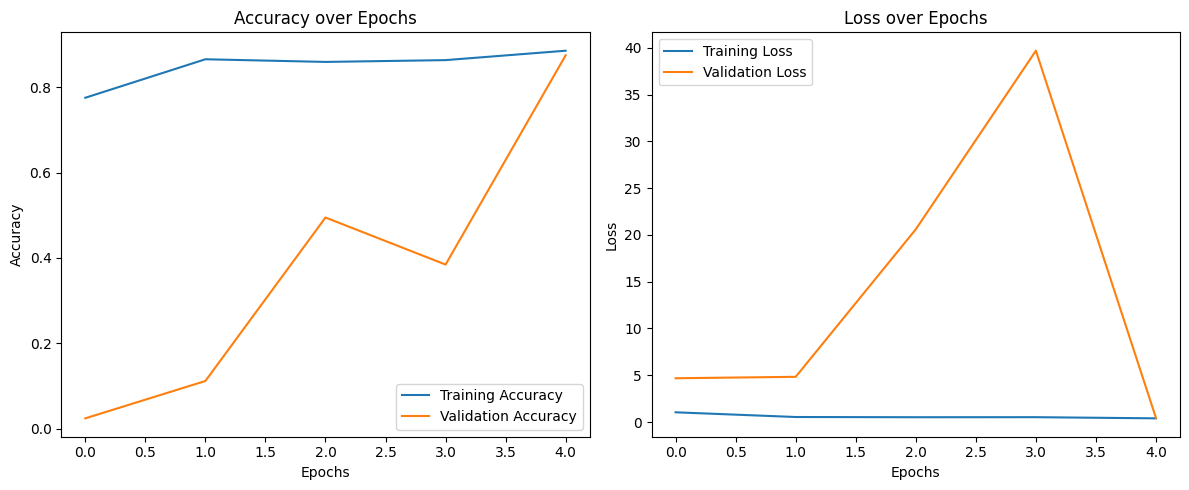

In [362]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# TEST DATA AND SUBMISSION

In [203]:
test_images = []
test_labels = []
for path in tqdm(os.listdir('/kaggle/input/boolart-image-classification/test_image')):
    img_path = os.path.join('/kaggle/input/boolart-image-classification/test_image' , path)
    img = image.load_img(img_path , target_size = (60 , 60))
    img_array = image.img_to_array(img)
    test_images.append(img_array)
    
    t2 = path
    t2 = t2.split('.')[0]
    test_labels.append(int(t2))

test_images = np.array(test_images)
print(f"Loaded {len(test_images)} images.")

100%|██████████| 8889/8889 [00:57<00:00, 155.77it/s]


Loaded 8889 images.


In [206]:
print(test_images.shape)
print(len(test_labels))

(8889, 60, 60, 3)
8889


In [207]:
# Save the array to a file
np.save('/kaggle/working/test_images_data.npy', test_images)
np.save('/kaggle/working/test_labels_data.npy',test_labels)

In [363]:
# Load the previously saved images
test_image_data = np.load('/kaggle/working/test_images_data.npy')
test_image_label = np.load('/kaggle/working/test_labels_data.npy')

In [364]:
print(test_image_data.shape)
print(len(test_image_label))

(8889, 60, 60, 3)
8889


In [365]:
test_image_data = test_image_data / 255.0

In [218]:
test_image_data[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [1.        , 1

In [343]:
test_image_label[0:10]

array([30778, 16916, 39500, 36417, 24819, 47378, 57177, 21440, 56540,
        3750])

In [366]:
submission = pd.read_csv('/kaggle/input/boolart-image-classification/sample_submission.csv')
submission.head()

,id,predict
0,39386,NaN
1,53759,NaN
2,26960,NaN
3,47957,NaN
4,13089,NaN


In [367]:
submission['predict'] = -1

In [222]:
submission.head()

,id,predict
0,39386,-1
1,53759,-1
2,26960,-1
3,47957,-1
4,13089,-1


In [224]:
test_image_label[0:10]

array([30778, 16916, 39500, 36417, 24819, 47378, 57177, 21440, 56540,
        3750])

In [368]:
submission['mytest_target'] = test_image_label.ravel()
submission['mypredict'] = -2

In [347]:
submission.head()

,id,predict,mytest_target,mypredict
0,39386,-1,30778,-2
1,53759,-1,16916,-2
2,26960,-1,39500,-2
3,47957,-1,36417,-2
4,13089,-1,24819,-2


In [230]:
test_image_data[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [1.        , 1

In [369]:
test_predict = model.predict(test_image_data)

278/278 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


In [349]:
test_predict[0]

array([9.7780710e-01, 1.0826164e-06, 2.8833645e-06, 1.6031468e-04,
       7.0089181e-06, 2.0104183e-02, 2.8550902e-08, 3.2003417e-13,
       1.0182982e-10, 3.3833619e-10, 9.7323756e-08, 8.7779419e-08,
       9.3780218e-06, 1.3511229e-07, 1.9283408e-17, 7.1508967e-04,
       4.3652733e-05, 1.0111856e-06, 3.0634109e-22, 1.0115409e-09,
       3.1660618e-06, 8.4649322e-15, 8.5444416e-09, 1.4018585e-04,
       3.6848094e-12, 4.4718746e-07, 1.8131211e-04, 8.2285557e-04,
       7.9211533e-12, 3.9540721e-10, 1.6964548e-11, 8.5029483e-10,
       3.1952858e-09, 9.8295655e-13, 4.0210666e-15, 1.1755520e-16,
       4.9301462e-18, 3.1490702e-11, 1.7468307e-30, 1.6884202e-11,
       4.1515966e-27, 7.9395933e-19, 1.1247404e-31, 1.0063351e-17],
      dtype=float32)

In [370]:
predicted_classes = np.argmax(test_predict, axis=1)
predicted_classes

array([ 0,  0,  1, ...,  2, 17,  8])

In [351]:
submission.head(3)

,id,predict,mytest_target,mypredict
0,39386,-1,30778,-2
1,53759,-1,16916,-2
2,26960,-1,39500,-2


In [371]:
for i in range(len(submission)):
    submission.loc[i , 'mypredict'] = predicted_classes[i]

In [372]:
submission.to_csv('ResNet_vust.csv', index=False)  # 'index=False' prevents saving the index column